**Revised on 3/5/2024: Changed source files**

This is the skeleton code for Task 1 of the midterm project. The files that are downloaded in step 4 are based on the [Ember 2018 dataset](https://arxiv.org/abs/1804.04637), and contain the features (and corresponding labels) extracted from 1 million PE files, split into 80\% training and 20\% test datasets. The code used for for feature extraction is available [here](https://colab.research.google.com/drive/16q9bOlCmnTquPtVXVzxUj4ZY1ORp10R2?usp=sharing). However, the preprocessing and featurization process may take up to 3 hours on Google Colab. Hence, I recommend using the processed datasets (Step 4) to speed up your development.

Also, note that there is a new optional step 8.5 - To speed up your experiments, you may want to sample the original dataset of 800k training samples and 200k test samples to smaller datasets.

**Step 1:** Mount your Google Drive by clicking on "Mount Drive" in the Files section (panel to the left of this text.)

**Step 2:** Go to Runtime -> Change runtime type and select T4 GPU.

**Step 3:** Create a folder in your Google Drive, and rename it to "vMalConv"

**Step 4:** Download the pre-processed training and test datasets.

In [ ]:
# # ~8GB
# !wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_train.dat
# !wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_test.dat
# !wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/y_train.dat
# !wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/y_test.dat
# !wget https://dsci6015s24-midterm.s3.amazonaws.com/v2/metadata.csv

--2024-03-12 11:31:59--  https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_train.dat
Resolving dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)... 3.5.29.102, 52.216.57.57, 52.217.131.97, ...
Connecting to dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)|3.5.29.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7619200000 (7.1G) [binary/octet-stream]
Saving to: ‘X_train.dat’

X_train.dat           4%[                    ] 321.54M  44.9MB/s    eta 2m 47s ^C
--2024-03-12 11:32:08--  https://dsci6015s24-midterm.s3.amazonaws.com/v2/X_test.dat
Resolving dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)... 52.216.37.153, 52.217.134.193, 3.5.25.212, ...
Connecting to dsci6015s24-midterm.s3.amazonaws.com (dsci6015s24-midterm.s3.amazonaws.com)|52.216.37.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1904800000 (1.8G) [binary/octet-stream]
Saving to: ‘X_test.d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 5:** Copy the downloaded files to vMalConv

In [ ]:
# !cp /content/X_train.dat /content/drive/MyDrive/vMalConv/X_train.dat
# !cp /content/X_test.dat /content/drive/MyDrive/vMalConv/X_test.dat
# !cp /content/y_train.dat /content/drive/MyDrive/vMalConv/y_train.dat
# !cp /content/y_test.dat /content/drive/MyDrive/vMalConv/y_test.dat
# !cp /content/metadata.csv /content/drive/MyDrive/vMalConv/metadata.csv

**Step 6:** Download and install Ember:

In [ ]:
!pip install git+https://github.com/PFGimenez/ember.git

  Cloning https://github.com/PFGimenez/ember.git to /tmp/pip-req-build-jhdwlrk3
  Running command git clone --filter=blob:none --quiet https://github.com/PFGimenez/ember.git /tmp/pip-req-build-jhdwlrk3
  Resolved https://github.com/PFGimenez/ember.git to commit 3b82fe63069884882e743af725d29cc2a67859f1
  Preparing metadata (setup.py) ... done
  Created wheel for ember: filename=ember-0.1.0-py3-none-any.whl size=13050 sha256=787574ee297244ae9c5a46e1e01c95b501b16e98dd6ec14608c8b444c235ded7
  Stored in directory: /tmp/pip-ephem-wheel-cache-6o19cmo9/wheels/8f/69/f9/1917c8df03b25fe53e8e2f6cb2c9f61a43dec179b19b10ab9f
Successfully built ember


In [ ]:
!pip install lief

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 9.6 MB/s eta 0:00:00


**Step 7:** Read vectorized features from the data files.

In [ ]:
# import ember
# X_train, y_train, X_test, y_test = ember.read_vectorized_features("drive/MyDrive/vMalConv/")
# metadata_dataframe = ember.read_metadata("drive/MyDrive/vMalConv/")

**Step 8:** Get rid of rows with no labels.

In [ ]:
import pickle
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#  labelrows = (y_train != -1)
# X_train = X_train[labelrows]
# y_train = y_train[labelrows]

In [ ]:
# print("X_train.shape:",X_train.shape)
# print("y_train.shape:",y_train.shape)
# print("X_test.shape:",X_test.shape)
# print("y_test.shape:",y_test.shape)

In [ ]:
# Save X_train and y_train as Pickle files
# with open('X_train.pkl', 'wb') as file:
#     pickle.dump(X_train, file)

# with open('y_train.pkl', 'wb') as file:
#     pickle.dump(y_train, file)

In [ ]:
# !cp /content/X_train.pkl /content/drive/MyDrive/vMalConv/X_train.pkl
# !cp /content/y_train.pkl /content/drive/MyDrive/vMalConv/y_train.pkl

In [ ]:
# X_train, y_train  = None, None
# # # Load X_train and y_train from Pickle files
# with open('/content/drive/MyDrive/vMalConv/X_train.pkl', 'rb') as file:
#     X_train = pickle.load(file)

# with open('/content/drive/MyDrive/vMalConv/y_train.pkl', 'rb') as file:
#     y_train = pickle.load(file)

**Optional Step 8.5:** To speed up your experiments, you may want to sample the original dataset of 800k training samples and 200k test samples to smaller datasets. You can use the [Pandas Dataframe sample() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html), or come up with your own sampling methodology. Be mindful of the fact that the database is heavily imbalanced.

In [ ]:
# ### Your code (optional) for sampling the original dataset.
# # Number of samples to keep for each class
# samples_per_class = 60000

# # Unique classes in y_train and their counts
# unique_classes, class_counts = np.unique(y_train, return_counts=True)

# # Set the seed for reproducibility
# np.random.seed(42)

# # Empty arrays to store sampled data
# sampled_X_train = []
# sampled_y_train = []

# # Iterate through each class
# for class_label, count in zip(unique_classes, class_counts):
#     # Get indices of samples belonging to the current class
#     class_indices = np.where(y_train == class_label)[0]

#     # Randomly sample
#     sampled_indices = np.random.choice(class_indices, size=min(samples_per_class, count), replace=False)

#     # Append sampled data to the result arrays
#     sampled_X_train.append(X_train[sampled_indices])
#     sampled_y_train.append(y_train[sampled_indices])

# # Concatenate the sampled data
# sampled_X_train = np.concatenate(sampled_X_train, axis=0)
# sampled_y_train = np.concatenate(sampled_y_train, axis=0)

# # Shuffle the sampled data (optional)
# shuffle_indices = np.random.permutation(len(sampled_X_train))
# sampled_X_train = sampled_X_train[shuffle_indices]
# sampled_y_train = sampled_y_train[shuffle_indices]

In [ ]:
# with open('sampled_X_train_100k.pkl', 'wb') as file:
#     pickle.dump(sampled_X_train, file)

# with open('sampled_y_train_100k.pkl', 'wb') as file:
#     pickle.dump(sampled_y_train, file)

In [ ]:
# !cp /content/sampled_X_train_100k.pkl /content/drive/MyDrive/vMalConv/sampled_X_train_60k.pkl
# !cp /content/sampled_y_train_100k.pkl /content/drive/MyDrive/vMalConv/sampled_y_train_60k.pkl

In [ ]:
X_train, y_train  = None, None

# # Load X_train and y_train from Pickle files
with open('/content/drive/MyDrive/vMalConv/sampled_X_train_100k.pkl', 'rb') as file:
    X_train = pickle.load(file)

with open('/content/drive/MyDrive/vMalConv/sampled_y_train_100k.pkl', 'rb') as file:
    y_train = pickle.load(file)

> **Task 1:** Complete the following code to build the architecture of MalConv in PyTorch:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MalConv(nn.Module):
    def __init__(self, input_length=3000000, embedding_dim=8, window_size=5, output_dim=1):
        super(MalConv, self).__init__()
        self.embed = nn.Embedding(input_length, embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 64, kernel_size=window_size, stride=window_size - 3, padding=0)
        self.conv2 = nn.Conv1d(embedding_dim, 64, kernel_size=window_size, stride=window_size - 3, padding=0)
        self.gating = nn.Sigmoid()
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)
        self.fc1 = nn.Linear(64, 64)
        self.fc2 = nn.Linear(64, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embed(x)
        # Convert to (batch_size, channels, length)
        x = x.transpose(1, 2)
        conv1 = self.conv1(x)
        conv2 = self.conv2(x)
        # Element-wise multiplication
        gated = conv1 * self.gating(conv2)
         # Remove the last dimension
        global_max_pool = self.global_max_pool(gated).squeeze(2)
        fc1 = F.relu(self.fc1(global_max_pool))
        fc2 = self.fc2(fc1)
        output = self.sigmoid(fc2)
        return output


model = MalConv()
print(model)

MalConv(
  (embed): Embedding(3000000, 8)
  (conv1): Conv1d(8, 64, kernel_size=(5,), stride=(2,))
  (conv2): Conv1d(8, 64, kernel_size=(5,), stride=(2,))
  (gating): Sigmoid()
  (global_max_pool): AdaptiveMaxPool1d(output_size=1)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


**Step 8:** Partial fit the standardScaler to avoid overloading the memory:

In [ ]:
# Feature Engineering
#we want to standardize the feature, we can use MinMaxScaler like we have used in previous calsses
MM= MinMaxScaler(feature_range=(0, 1000))
MM.fit(X_train)
X_train = MM.transform(X_train)
# X_test=ss.fit_transform(X_test)

In [ ]:
scaler_filename = "minmax_scaler.pkl"
with open(scaler_filename, "wb") as f:
  pickle.dump(MM, f)

print(f"MinMaxScaler saved to {scaler_filename}")

MinMaxScaler saved to minmax_scaler.pkl


In [ ]:
!cp minmax_scaler.pkl '/content/drive/MyDrive/vMalConv/minmax_scaler.pkl'

In [ ]:
!ls -alh /content/drive/MyDrive/vMalConv/

total 13G
drwx------ 2 root root 4.0K Mar 12 05:44 .git
-rw------- 1 root root  92M Mar 12 12:59 malConv_model_weights.pt
-rw------- 1 root root  48K Mar 12 13:23 minmax_scaler.pkl
drwx------ 2 root root 4.0K Mar 12 13:03 model_checkpoints
-rw------- 1 root root 4.2M Mar 12 06:51 model_epoch_10.pt
-rw------- 1 root root 4.2M Mar 12 06:52 model_epoch_15.pt
-rw------- 1 root root 4.2M Mar 12 06:53 model_epoch_20.pt
-rw------- 1 root root 4.2M Mar 12 06:54 model_epoch_25.pt
-rw------- 1 root root 4.2M Mar 12 06:50 model_epoch_5.pt
-rw------- 1 root root 364M Mar 12 01:24 sampled_X_test.pkl
-rw------- 1 root root 1.8G Mar 12 01:46 sampled_X_train_100k.pkl
-rw------- 1 root root 1.1G Mar 12 01:31 sampled_X_train_60k.pkl
-rw------- 1 root root 455M Mar 12 00:35 sampled_X_train.pkl
-rw------- 1 root root 909M Mar 12 00:39 sampled_X_train_t_d_C.pkl
-rw------- 1 root root 455M Mar 12 00:38 sampled_X_train_t.pkl
-rw------- 1 root root 157K Mar 12 01:24 sampled_y_test.pkl
-rw------- 1 root root 7

In [ ]:
X_train.shape

(200000, 2381)

In [ ]:
X_train

array([[214.52763  ,  16.554777 ,  11.367614 , ...,   0.       ,
          0.       ,   0.       ],
       [161.865    ,   9.345117 ,   7.765581 , ...,   0.       ,
          0.       ,   0.       ],
       [ 10.920071 ,   5.106545 ,   7.635355 , ...,   2.1646316,
          0.       ,   0.       ],
       ...,
       [441.881    ,  11.59673  ,   7.5959673, ...,   0.       ,
          0.       ,   0.       ],
       [ 42.252342 ,   4.0523977,   3.9646916, ...,   0.       ,
          0.       ,   0.       ],
       [150.92     ,  18.592607 ,  11.074494 , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)

No Need

In [ ]:
## Reshape to create 3 channels ##
#import numpy as np
#X_train = np.reshape(X_train,(-1,1,2381))
#y_train = np.reshape(y_train,(-1,1,1))

**Load, Tensorize, and Split** The following code takes care of converting the training data into Torch Tensors, and then splits it into 80% training and 20% validation datasets.

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Convert your numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.int)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Split the data into training and validation sets (80% training, 20% validation)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_tensor, y_train_tensor, test_size=0.25, random_state=42
)

# Create TensorDatasets and DataLoaders for training and validation sets
train_dataset = TensorDataset(X_train_split, y_train_split)
val_dataset = TensorDataset(X_val_split, y_val_split)

batch_size = 4000  # Adjust based on GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

> **Task 2:** Complete the following code to train the model on the GPU for 15 epochs, with a batch size of 64. If you are on Google Colab, don't forget to change the kernel in Runtime -> Change runtime type -> T4 GPU.

In [ ]:
import gc

del X_train
del X_train_split
del X_val_split
del y_train
del y_train_split
del y_val_split

gc.collect()

0

Epoch 1, Training Loss: 0.6736811305347242, Validation Loss: 0.641278707064115
Epoch 2, Training Loss: 0.5808345597041281, Validation Loss: 0.5138574976187485
Epoch 3, Training Loss: 0.47225125604554224, Validation Loss: 0.43094526345913226
Epoch 4, Training Loss: 0.40524586799897644, Validation Loss: 0.3789050212273231
Epoch 5, Training Loss: 0.3613747028928054, Validation Loss: 0.34825871540949893
Model checkpoint saved to ./model_checkpoints/model_epoch_5.pt
Epoch 6, Training Loss: 0.33705400401040125, Validation Loss: 0.33074538524334246
Epoch 7, Training Loss: 0.32160747835510656, Validation Loss: 0.320548761349458
Epoch 8, Training Loss: 0.3120211151085402, Validation Loss: 0.3116742166189047
Epoch 9, Training Loss: 0.3022562320295133, Validation Loss: 0.3064528153492854
Epoch 10, Training Loss: 0.2955634350839414, Validation Loss: 0.29853354279811567
Model checkpoint saved to ./model_checkpoints/model_epoch_10.pt


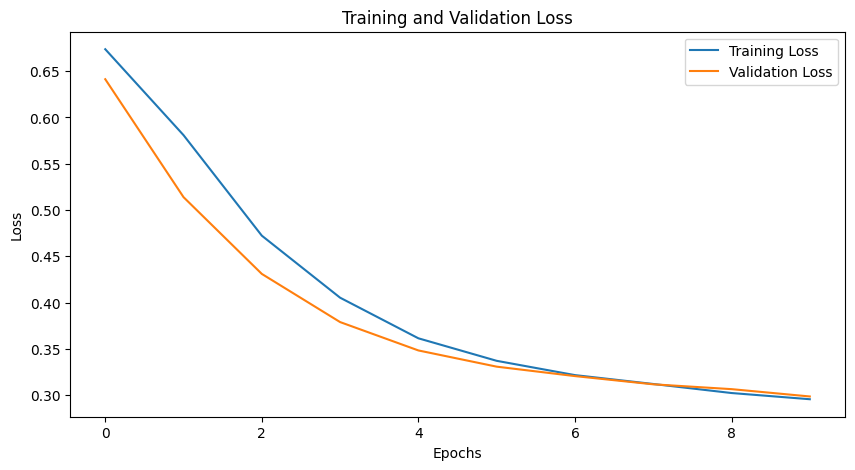

In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import os
import matplotlib.pyplot as plt

model = MalConv()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Directory to save model checkpoints
save_dir = "./model_checkpoints"
os.makedirs(save_dir, exist_ok=True)

# Training Loop with Validation
num_epochs = 10
train_losses = []
val_losses = []

# Function to check early stopping
def early_stopping(val_losses, patience=5):
    if len(val_losses) < patience + 1:
        return False
    return all(val_losses[-1] >= val_losses[-i - 1] for i in range(1, patience + 1))

# Early stopping parameters
patience = 5
early_stopping_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels.float())
            val_loss += loss.item()

    epoch_val_loss = val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)

    print(f'Epoch {epoch+1}, Training Loss: {epoch_loss}, Validation Loss: {epoch_val_loss}')

    # Check for early stopping
    if early_stopping(val_losses, patience):
        print(f'Early stopping after {epoch+1} epochs without improvement.')
        break

    if (epoch + 1) % 5 == 0:
        checkpoint_path = os.path.join(save_dir, f'model_epoch_{epoch+1}.pt')
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
        }, checkpoint_path)
        print(f'Model checkpoint saved to {checkpoint_path}')

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
X_test, y_test  = None, None

# # Load X_train and y_train from Pickle files
with open('/content/drive/MyDrive/vMalConv/sampled_X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)

with open('/content/drive/MyDrive/vMalConv/sampled_y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [ ]:
X_test = X_test[:1000]
y_test = y_test[:1000]

In [ ]:
X_test = MM.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Convert test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test, dtype=torch.int)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create a TensorDataset and DataLoader for test data
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Ensure the model is in evaluation mode
model.eval()

# Lists to store model predictions and actual labels
predictions = []
labels_list = []  # Renamed to avoid confusion with the loop variable

with torch.no_grad():
    for inputs, labels_batch in test_loader:
        inputs = inputs.to(device)  # Move inputs to the same device as model
        outputs = model(inputs)
        predicted = torch.round(outputs.squeeze())  # Convert probabilities to binary predictions (0 or 1)

        # Store predictions and labels
        predictions.extend(predicted.cpu().numpy())
        labels_list.extend(labels_batch.cpu().numpy())

# Compute metrics
accuracy = accuracy_score(labels_list, predictions)
precision = precision_score(labels_list, predictions)
recall = recall_score(labels_list, predictions)

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Test Accuracy: 0.8220
Precision: 0.7839
Recall: 0.8770


Test Accuracy: 0.8220
Precision: 0.7839
Recall: 0.8770


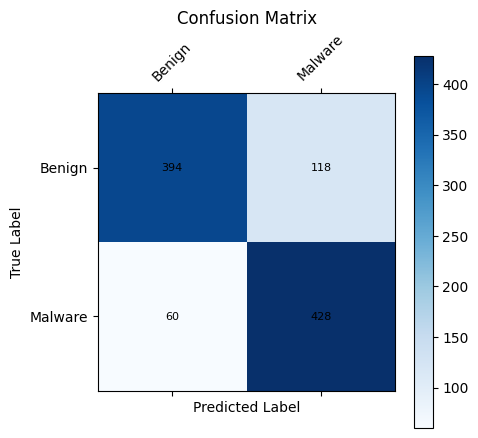

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(labels_list, predictions)
precision = precision_score(labels_list, predictions)
recall = recall_score(labels_list, predictions)
cm = confusion_matrix(labels_list, predictions)

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Plot the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
class_names = ['Benign', 'Malware']
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

for i in range(len(cm)):
  for j in range(len(cm)):
    plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=8)

plt.show()

In [ ]:
# Save the model parameters
model_weights_path = "malConv_model_weights.pt"
torch.save(model.state_dict(), model_weights_path)
print(f"Model weights saved to {model_weights_path}")
# Save a checkpoint including model state, optimizer state, and other info
checkpoint_path = os.path.join(save_dir, "model_final_checkpoint.pt")
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'last_loss': loss.item(),
    # Include any other information you need
}, checkpoint_path)
print(f"Full model checkpoint saved to {checkpoint_path}")

Model weights saved to malConv_model_weights.pt
Full model checkpoint saved to ./model_checkpoints/model_final_checkpoint.pt


In [ ]:
!ls -lah

total 92M
drwxr-xr-x 1 root root 4.0K Mar 12 12:59 .
drwxr-xr-x 1 root root 4.0K Mar 12 11:52 ..
drwxr-xr-x 4 root root 4.0K Mar  8 14:25 .config
drwx------ 5 root root 4.0K Mar 12 11:53 drive
-rw-r--r-- 1 root root  92M Mar 12 12:59 malConv_model_weights.pt
drwxr-xr-x 2 root root 4.0K Mar 12 12:59 model_checkpoints
drwxr-xr-x 1 root root 4.0K Mar  8 14:25 sample_data


In [ ]:
#reload model

# Create a new model instance
model = MalConv()

# Load the weights
model.load_state_dict(torch.load("malConv_model_weights.pt"))

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.eval()

print("Loaded model from disk")

# #  load the full checkpoint
# checkpoint = torch.load("/content/model_checkpoints/model_final_checkpoint.pt")
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust hyperparameters as needed
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

Loaded model from disk


**Task 4:** Comment on the results in this text box.   


The Model was developed using pytorch and trained on over 200k datapoints with the help of google colab provided free T4 GPU. The training and testing accuracy are pretty good. F1 -score = 2*(0.7839* 0.8770)/(0.7839 + 0.8770) = 0.828. There seems to be higher False positives and that is somewhat concerning. More training should be done to make sure that doesn't happen and more higher end resources would be required to develop and train more complex and powerful models.